In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def plot_graph(graph):
    # print("\n\n========== Randomly Generated Graph ==========")
    # print(graph)
    # Print the graph's edges and weights
    # for u, v, d in graph.edges(data=True):
    # print(f"Edge: {u} -> {v}, Weight: {d['weight']}")
    pos = nx.spiral_layout(graph)
    # labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
    nx.draw_networkx_edge_labels(graph, pos)
    plt.title("Graph")
    plt.show()

In [3]:
# Define a heuristic function
def heuristic_function(G, u, v, weight):
    # Considering weight divided by degree of the vertices
    return weight / (nx.degree(G, u) + nx.degree(G, v))

In [4]:
def find_augmentation(G, root):
    """
    Finds the minimum weighted branching and augments the original graph.
    Args:
    G: The complete graph with weighted edges.
    root: The root of the spanning tree.
    Returns:
    aug: The set of edges added to the original graph.
    """
    # Create a copy of the graph.
    GDirectedCopy = nx.DiGraph(G)
    # for edge in GDirectedCopy.edges(data=True):
        # print(f"{edge[0]} - {edge[1]} : {edge[2]['weight']}")
    print("complete graph: ")
    plot_graph(GDirectedCopy)
    # Find the spanning tree and root it at the given root.
    T = nx.minimum_spanning_arborescence(GDirectedCopy)
    print("minimum spanning arboresence T: ")
    plot_graph(T)
    print("T edges: ")
    for edge in T.edges(data=True):
        print(f"{edge[0]} - {edge[1]}")
        # print("G edges: ")
        # for edge in G.edges:
        # print(f"{edge[0]} - {edge[1]}")
    print("Spanning Tree: ")
    G0 = nx.DiGraph()
    G0.add_nodes_from(T)
    for edge in T.edges(data=True):
        G0.add_edge(edge[0], edge[1], weight=G[edge[0]][edge[1]]["weight"])
        G0.add_edge(edge[1], edge[0], weight=G[edge[1]][edge[0]]["weight"])
    plot_graph(G0)
    # print("G0 edges: ")
    # for edge in G0.edges:
        # print(f"{edge[0]} - {edge[1]}")
    Gd = nx.DiGraph()
    Gd.add_nodes_from(G)
    # Add edges from T to Gd with weight 0.
    for edge in T.edges:
        Gd.add_edge(edge[0], edge[1], weight=0)
    # print("len: ", len(set(G.edges) - set(G0.edges)))
    # Add edges for back edges and non-back edges.
    aug = set()
    for edge in set(G.edges) - set(G0.edges):
        u, v = edge
        weight = G[u][v]["weight"]
        t = nx.lowest_common_ancestor(T, u, v)
        score = heuristic_function(G, u, v, weight)
        if (t == u or t == v) and score > 0.5:
            Gd.add_edge(u, v, weight=G[u][v]["weight"])
            aug.add(edge)
        else:
            c = 0
            if (heuristic_function(G, t, u, G[t][u]["weight"]) > 0.5):
                Gd.add_edge(t, u, weight=G[t][u]["weight"])
                c = c + 1
            if (heuristic_function(G, t, u, G[t][v]["weight"]) > 0.5):
                Gd.add_edge(t, v, weight=G[t][v]["weight"])
                c = c + 1
            if c == 2:
                aug.add(edge)
    # print("===== Gd Edges =====")
    # for edge in Gd.edges(data=True):
        # print(f"{edge[0]} - {edge[1]} : {edge[2]['weight']}")
    # Find the minimum weighted branching in Gd.
    branching = nx.minimum_branching(GDirectedCopy)
    # branching = nx.algorithms.tree.branchings.Edmonds(GDirectedCopy)
    # Add the corresponding edges in E - E0 to aug.
    for edge in branching.edges:
        print(edge)
    if edge not in set(T.edges):
        aug.add(edge)
    return aug

complete graph: 


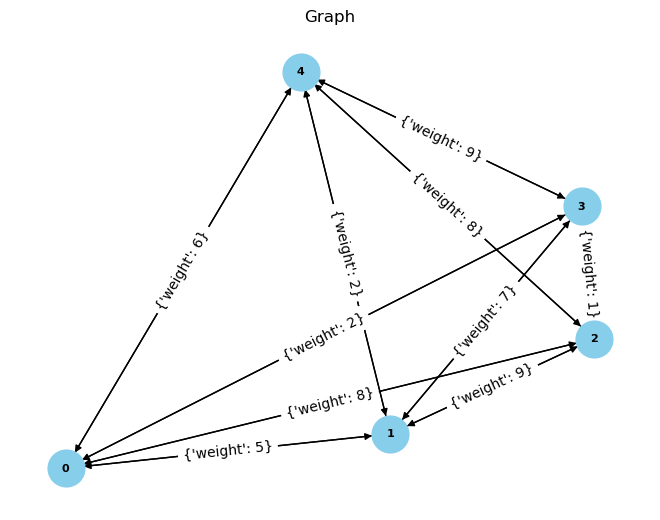

minimum spanning arboresence T: 


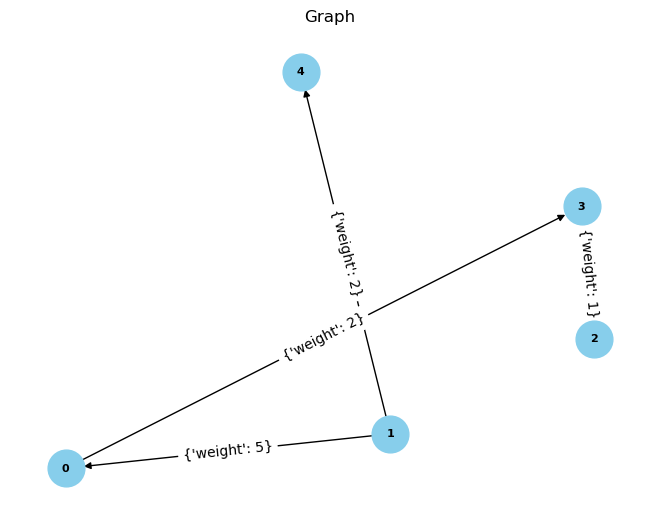

T edges: 
0 - 3
1 - 0
1 - 4
3 - 2
Spanning Tree: 


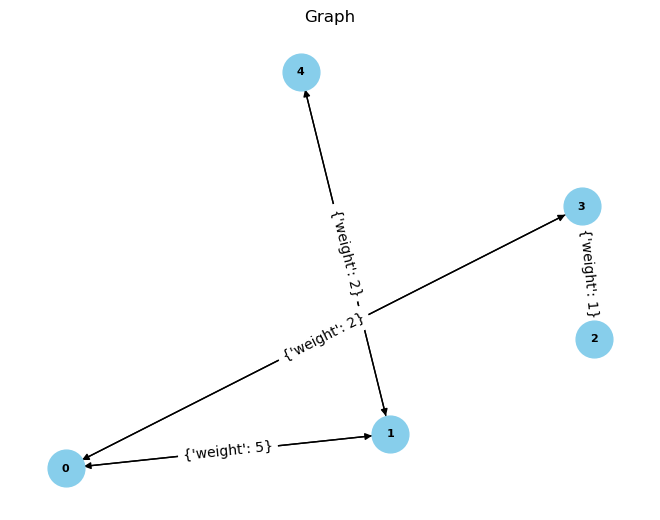

Edges which need to be augmented to make the graph biconnected are: 
Augmentation: {(0, 2), (1, 2), (1, 3)}


In [5]:
G = nx.complete_graph(5)
for edge in G.edges():
    weight = random.randint(1, 10) # You can adjust the range of weights as needed
    G[edge[0]][edge[1]]['weight'] = weight
root = "0"
aug = find_augmentation(G, root)
print("Edges which need to be augmented to make the graph biconnected are: ")
print(f"Augmentation: {aug}")